In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reading data from Keras Datasets

In [4]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [5]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

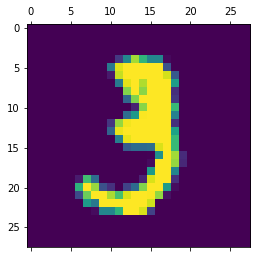

In [8]:
plt.matshow(X_train[10])

# Scaling the Dataset

In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [13]:
X_train_flattened.shape

(60000, 784)

# Approach 1: Without Hidden layers

In [14]:
model=keras.Sequential([keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics='accuracy')
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1879 - accuracy: 0.5958
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9769 - accuracy: 0.7054
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7902 - accuracy: 0.7370
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6262 - accuracy: 0.7615
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4833 - accuracy: 0.7763


In [15]:
y_pred=model.predict(X_test_flattened)

In [16]:
np.argmax(y_pred[10])

0

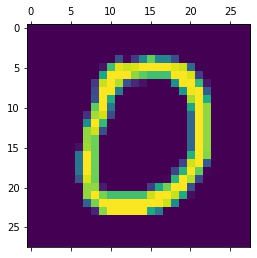

In [17]:
plt.matshow(X_test[10])

In [18]:
y_predictions=[np.argmax(i) for i in y_pred]

In [19]:
cm=tf.math.confusion_matrix(y_test,y_predictions)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 927,    2,    4,    6,    0,    3,   31,    1,    6,    0],
       [   0, 1108,    8,    4,    0,    0,    4,    0,   11,    0],
       [  20,   85,  778,   33,   15,    0,   38,   22,   40,    1],
       [   8,   50,   26,  858,    1,    2,    5,   21,   28,   11],
       [   2,   49,    2,    0,  758,    0,   32,    9,    4,  126],
       [  44,  115,    5,  204,   29,  367,   29,   34,   29,   36],
       [  27,   48,    6,    0,   12,    6,  858,    0,    1,    0],
       [   2,   73,   14,    2,    9,    0,    3,  891,    7,   27],
       [  24,   93,    8,   93,    9,    5,   18,   24,  670,   30],
       [  23,   43,    5,   10,   63,    0,    1,   74,    8,  782]])>

Text(0.5, 70.72222222222221, 'predictions')

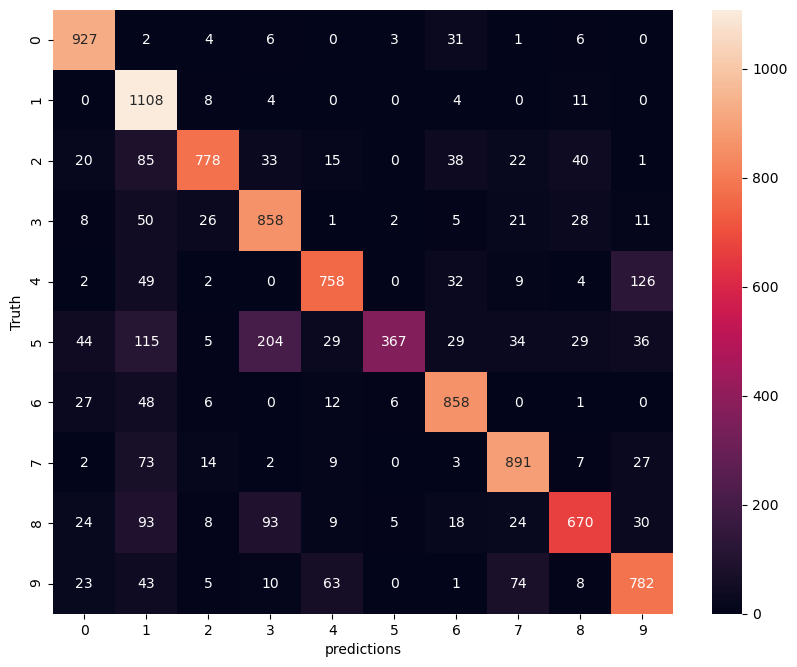

In [20]:

plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(cm,annot=True,fmt='d')
plt.ylabel('Truth')
plt.xlabel('predictions')

# Approach 2: Using Hidden Layer

In [21]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,) ,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1998 - accuracy: 0.7108
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4972 - accuracy: 0.8723
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3883 - accuracy: 0.8946
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3459 - accuracy: 0.9030
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3216 - accuracy: 0.9080


In [22]:
y_pred2=model.predict(X_test_flattened)

In [23]:
y_predictions2=[np.argmax(i) for i in y_pred2]


In [24]:
cm2=tf.math.confusion_matrix(y_test,y_predictions2)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    3,    1,    0,    4,    8,    1,    3,    0],
       [   0, 1105,    1,    3,    1,    2,    4,    1,   18,    0],
       [  11,    6,  909,   19,   15,    2,   14,   11,   41,    4],
       [   2,    1,   19,  916,    0,   27,    2,   17,   16,   10],
       [   2,    3,    5,    1,  906,    1,   12,    2,    3,   47],
       [  13,    2,    4,   46,   12,  756,   18,    9,   23,    9],
       [  14,    3,    5,    1,   10,   14,  907,    1,    3,    0],
       [   3,   11,   23,    5,    8,    0,    0,  921,    3,   54],
       [  10,    6,    9,   33,   12,   33,   12,    7,  829,   23],
       [  14,    6,    2,   13,   33,    7,    0,   16,    4,  914]])>

Text(0.5, 70.72222222222221, 'predictions')

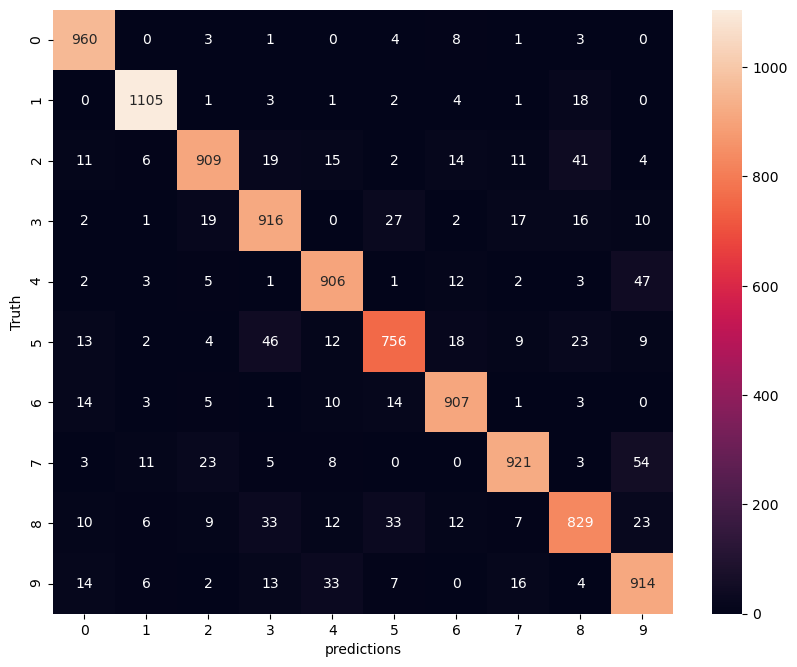

In [25]:

plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(cm2,annot=True,fmt='d')
plt.ylabel('Truth')
plt.xlabel('predictions')

# Approach 3: Using Keras flatten method and 10 Hidden Layers

In [30]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2025 - accuracy: 0.7006
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5107 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3954 - accuracy: 0.8920
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3488 - accuracy: 0.9018
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3224 - accuracy: 0.9085
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.9130
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2908 - accuracy: 0.9165
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2797 - accuracy: 0.9194
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2696 - accuracy: 0.9222
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.260

In [31]:
y_pred3=model.predict(X_test)
y_predictions3=[np.argmax(i) for i in y_pred3]
cm3=tf.math.confusion_matrix(y_test,y_predictions3)
cm3

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    1,    0,    5,    8,    3,    1,    0],
       [   0, 1108,    2,    2,    1,    1,    4,    2,   15,    0],
       [  10,    6,  914,   18,   14,    2,   10,   13,   42,    3],
       [   2,    1,   12,  923,    1,   26,    1,   19,   22,    3],
       [   1,    2,    4,    0,  937,    1,    9,    2,    5,   21],
       [   8,    3,    4,   30,   11,  784,   13,    8,   25,    6],
       [   8,    3,    5,    1,   10,   10,  917,    2,    2,    0],
       [   1,    7,   22,    8,    7,    0,    0,  961,    2,   20],
       [   8,    5,    8,   19,   12,   27,   12,   11,  865,    7],
       [  10,    8,    1,   11,   44,    6,    1,   25,    4,  899]])>

Text(0.5, 70.72222222222221, 'predictions')

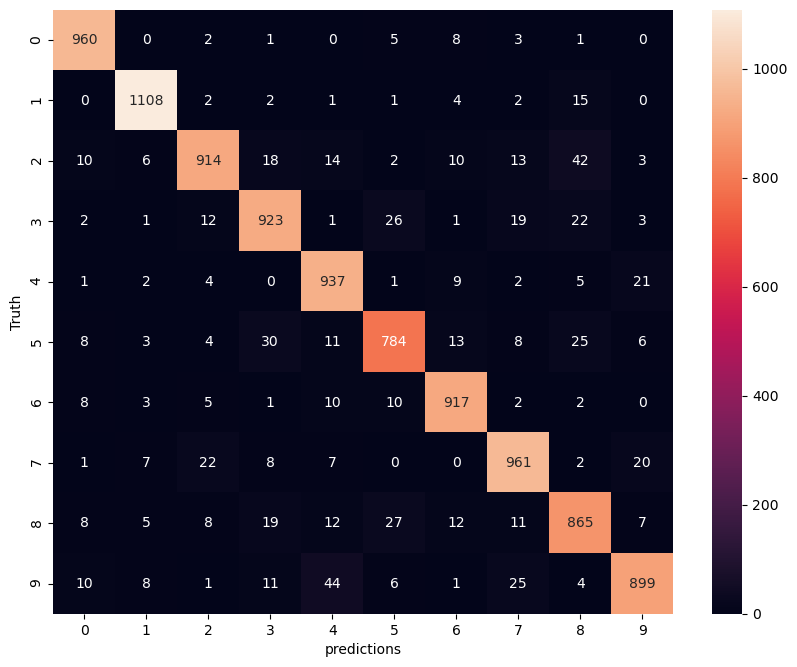

In [32]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(cm3,annot=True,fmt='d')
plt.ylabel('Truth')
plt.xlabel('predictions')

In [33]:
np.trace(cm3)

9268

# Comparing the accuracies for three aproaches

In [41]:
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
approach_1=accuracy_score(y_test,y_predictions)

In [44]:
approach_2=accuracy_score(y_test,y_predictions2)

In [45]:
approach_3=accuracy_score(y_test,y_predictions3)

In [47]:
acc_score=pd.DataFrame({'Approaches':['Approach_1','Approach_2','Approach_3'],'Accuray_Score':[approach_1,approach_2,approach_3]})

In [59]:
acc_score.set_index('Approaches',inplace=True)

<AxesSubplot:xlabel='Approaches'>

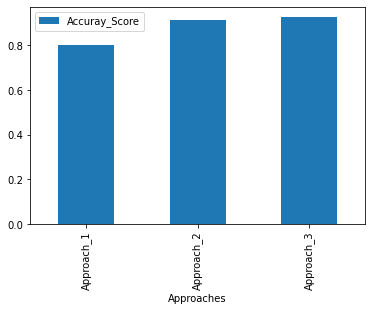

In [61]:
acc_score.plot(kind='bar')